# CARTERA CONSERVADORA, MODERADA Y AGRESIVA

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

En el estudio a continuación, el objetivo es, con los datos estudiados anteriormente, calcular la frontera eficiente, es decir, el conjunto de las carteras más eficientes del mercado, teniendo en cuenta el mayor rendimiento posible con la menor cantidad de riesgo quue supongan.

Se ha decidido llevar a cabo este estudio específico con esta herramienta (Python), pues debido al resto de trabajos ejecutados en el curso, tenemos más soltura con este lenguaje que con Excel. Sin embargo, el análisis estratégico de los cuatro tipos de activo se ha realizado en excel pues, en ese caso y con el material proporcionado en clase, las estrategias resultaban más fáciles de manejar (sobretodo en grupo) con esa herramienta.

En primer lugar, cargamos las librerias necesarias y los datos recogidos después del análisis estratéico en cuestión.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import seaborn as sns
import statistics
import math

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
estrategia1 = pd.read_csv('./Parte 1/Estrategia_Trend').set_index('Date')
estrategia2 = pd.read_csv('./Parte 1/Estrategia_Mean').set_index('Date')
estrategia3 = pd.read_csv('./Parte 1/Estrategia_Ind').set_index('Date')
estrategia4 = pd.read_csv('./Parte 1/Estrategia_Carry').set_index('Date')
estrategia5 = pd.read_csv('./Parte 2/Estrategia_Low_Beta_final.csv').set_index('Date')
estrategia6 = pd.read_csv('./Parte 2/Estrategia_Momentum_final.csv').set_index('Date')
estrategia7 = pd.read_csv('./Parte 2/Estrategia_Quality_final.csv').set_index('Date')
estrategia8 = pd.read_csv('./Parte 2/Estrategia_Recommendation_final.csv').set_index('Date')
estrategia9 = pd.read_csv('./Parte 2/Estrategia_Sentiment_final.csv').set_index('Date')
estrategia10 = pd.read_csv('./Parte 2/Estrategia_Size.csv').set_index('Date')
estrategia11 = pd.read_csv('./Parte 2/Estrategia_Value_final.csv').set_index('Date')

In [3]:
datos = pd.concat([estrategia1, estrategia2], axis = 1)
datos = pd.concat([datos, estrategia3], axis = 1)
datos = pd.concat([datos, estrategia4], axis = 1)
datos = pd.concat([datos, estrategia5], axis = 1)
datos = pd.concat([datos, estrategia6], axis = 1)
datos = pd.concat([datos, estrategia7], axis = 1)
datos = pd.concat([datos, estrategia8], axis = 1)
datos = pd.concat([datos, estrategia9], axis = 1)
datos = pd.concat([datos, estrategia10], axis = 1)
datos = pd.concat([datos, estrategia11], axis = 1)
datos.dropna(inplace = True)
datos

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
2015-05-01,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-05-05,99.879543,99.583543,100.037898,100.000000,100.00000,100.000000,100.390716,101.389413,99.871516,100.823727,99.928104,100.922207,99.818228,99.492990,99.612971,99.013883,99.368421
2015-05-06,99.309707,100.037212,99.609429,100.000000,100.00000,100.000000,102.299889,99.849762,101.297372,100.923278,99.195129,100.673478,99.771916,99.288724,99.657093,98.867981,98.272281
2015-05-07,99.659281,100.020083,99.619968,100.000000,100.00000,99.788391,101.099560,99.906751,101.083018,100.321316,99.712348,101.129387,99.124335,100.001805,99.455399,98.997409,98.173976
2015-05-08,100.708763,99.739002,99.397529,100.000000,100.00000,99.045674,98.970261,100.842625,100.330665,100.762049,98.454553,100.478632,98.788096,99.661157,100.122002,99.875429,97.552634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,129.363599,140.090799,100.697188,394.333691,191.50521,109.235866,113.637836,114.251101,122.347837,97.517193,142.603350,212.390985,497.040286,195.853970,117.632552,89.133109,295.345423
2019-09-24,129.064213,140.036716,100.702383,394.333691,191.50521,109.235866,112.761195,114.692181,122.284708,97.658136,140.269712,210.252135,493.451516,194.070315,117.035102,89.066437,293.574950
2019-09-25,129.573654,140.194287,100.839089,394.333691,191.50521,109.235866,114.244830,113.401649,123.391403,97.545505,144.305295,211.728288,499.661401,196.138702,116.136063,89.630885,296.888260
2019-09-26,129.537019,140.159227,100.825931,394.333691,191.50521,109.235866,114.137159,113.685244,123.552418,97.502386,143.102811,211.341511,499.338413,194.216956,116.289490,90.673486,297.768331


In [4]:
datos = datos.reset_index()

En las 5 primeras líneas de la base de datos importada, vemos la estrategia generada para cada activo en el orden en el que se han estudiado anteriormente en los Excels.

Editamos la base de datos insertada para convertir los datos de la fecha en formato de fecha y eliminar la columna de indice que se incluyó al importar la base de datos.

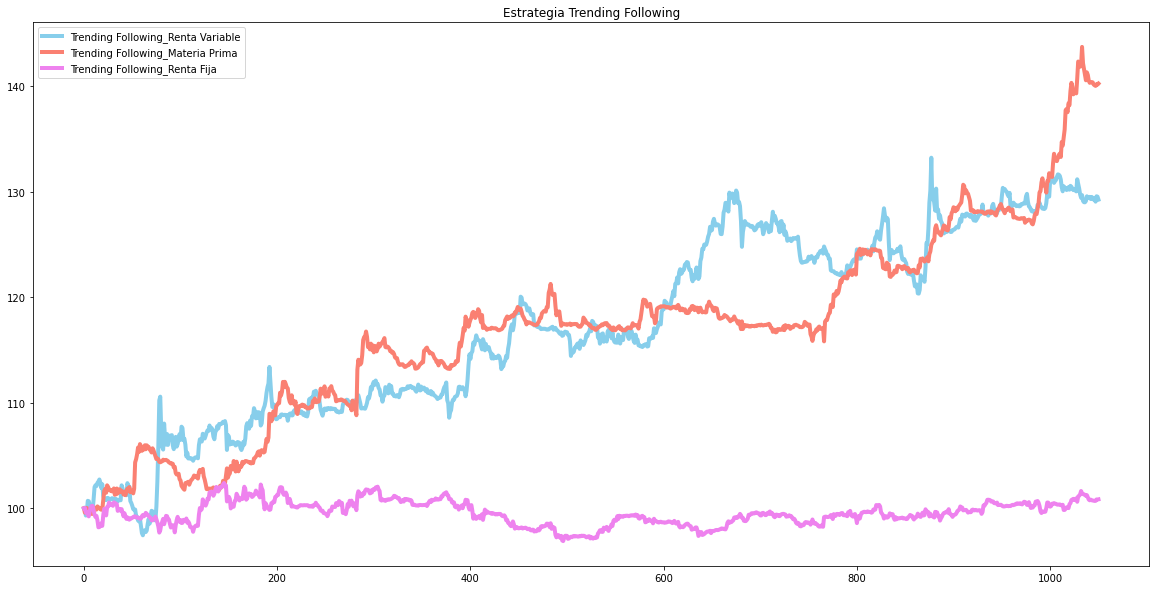

In [5]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Trending Following_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Trending Following_Renta Variable')
plt.plot(datos.index, datos['Trending Following_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Trending Following_Materia Prima')
plt.plot(datos.index, datos['Trending Following_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Trending Following_Renta Fija')
plt.title('Estrategia Trending Following')
plt.legend()

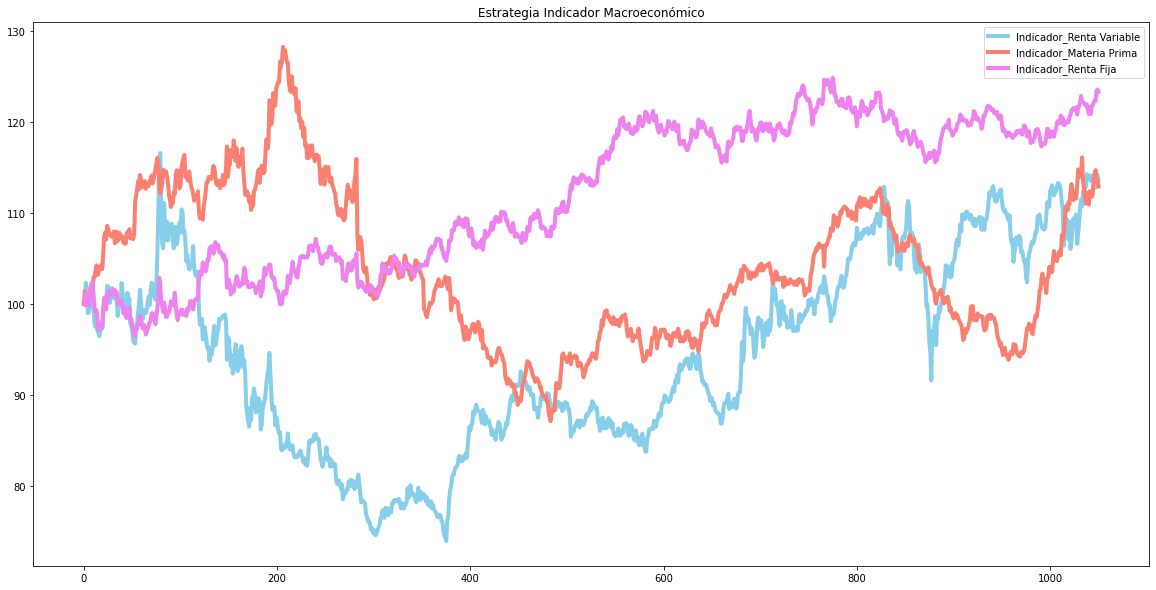

In [6]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Indicador_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Indicador_Renta Variable')
plt.plot(datos.index, datos['Indicador_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Indicador_Materia Prima')
plt.plot(datos.index, datos['Indicador_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Indicador_Renta Fija')
plt.title('Estrategia Indicador Macroeconómico')
plt.legend()

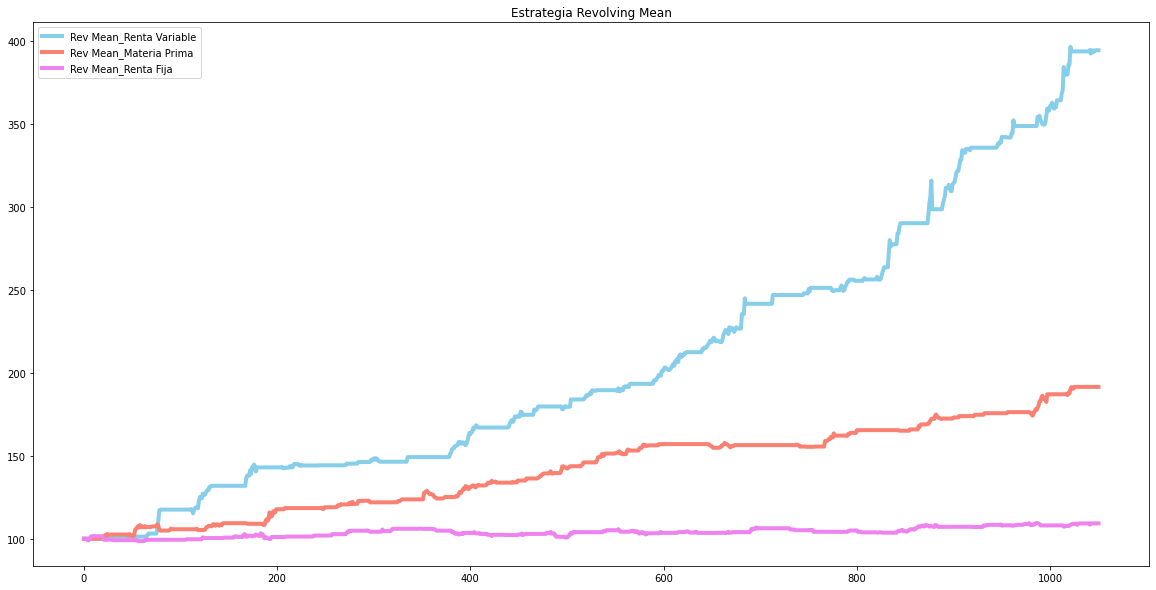

In [7]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Rev Mean_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Rev Mean_Renta Variable')
plt.plot(datos.index, datos['Rev Mean_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Rev Mean_Materia Prima')
plt.plot(datos.index, datos['Rev Mean_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Rev Mean_Renta Fija')
plt.title('Estrategia Revolving Mean')
plt.legend()

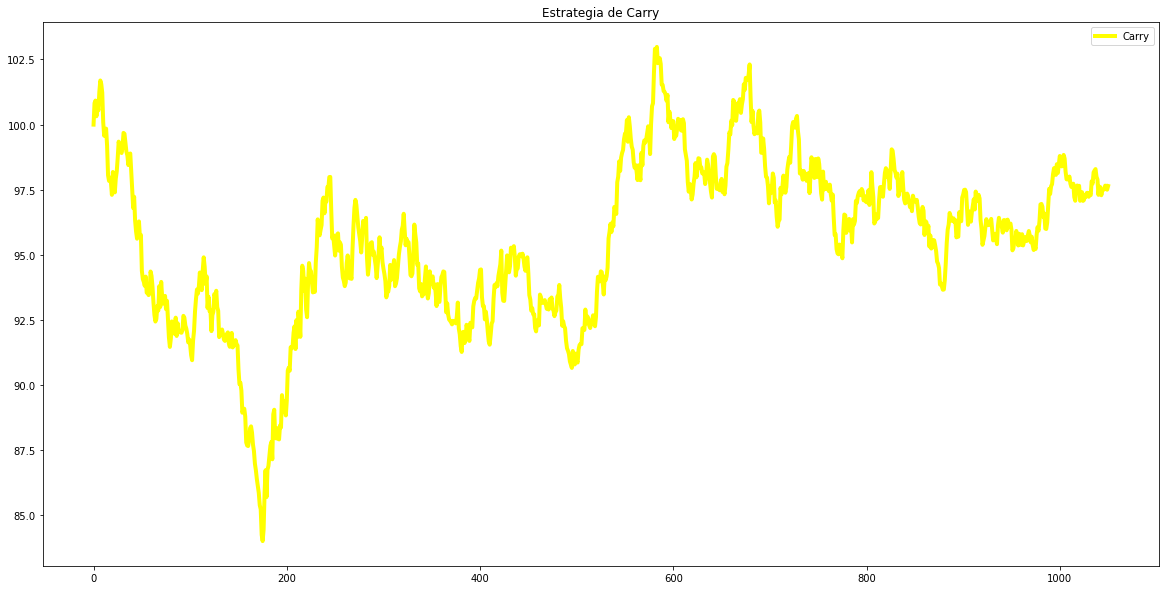

In [8]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Carry Final'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'Carry')
plt.title('Estrategia de Carry')
plt.legend()

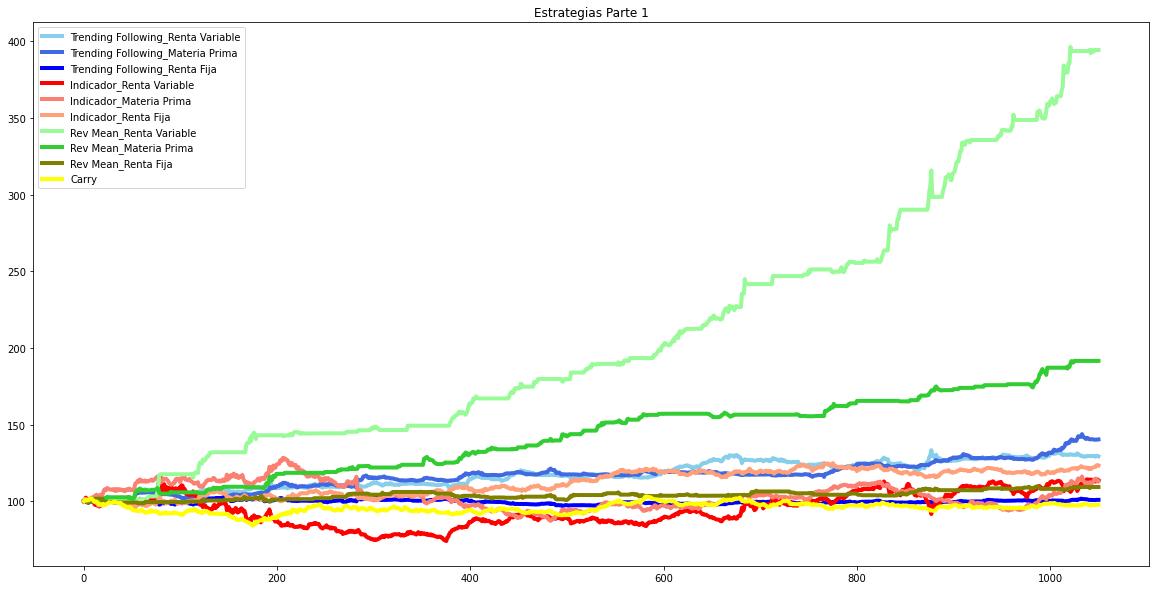

In [9]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Trending Following_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Trending Following_Renta Variable')
plt.plot(datos.index, datos['Trending Following_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='royalblue', 
         linewidth=4, label = 'Trending Following_Materia Prima')
plt.plot(datos.index, datos['Trending Following_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='blue', 
         linewidth=4, label = 'Trending Following_Renta Fija')
plt.plot(datos.index, datos['Indicador_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='red', 
         linewidth=4, label = 'Indicador_Renta Variable')
plt.plot(datos.index, datos['Indicador_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Indicador_Materia Prima')
plt.plot(datos.index, datos['Indicador_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='lightsalmon', 
         linewidth=4, label = 'Indicador_Renta Fija')
plt.plot(datos.index, datos['Rev Mean_Renta Variable'], marker='', markerfacecolor='blue', markersize=12, color='palegreen', 
         linewidth=4, label = 'Rev Mean_Renta Variable')
plt.plot(datos.index, datos['Rev Mean_Materia Prima'], marker='', markerfacecolor='salmon', markersize=12, color='limegreen', 
         linewidth=4, label = 'Rev Mean_Materia Prima')
plt.plot(datos.index, datos['Rev Mean_Renta Fija'], marker='', markerfacecolor='violet', markersize=12, color='olive', 
         linewidth=4, label = 'Rev Mean_Renta Fija')
plt.plot(datos.index, datos['Carry Final'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'Carry')
plt.title('Estrategias Parte 1')
plt.legend()

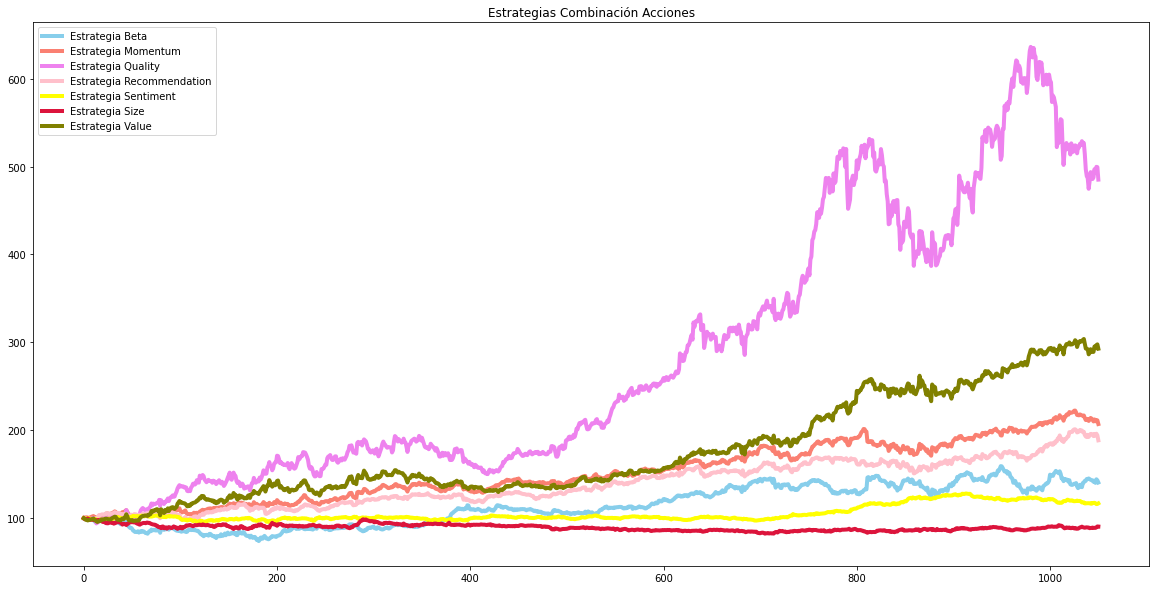

In [10]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Beta')
plt.plot(datos.index, datos['Momentum'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Estrategia Momentum')
plt.plot(datos.index, datos['Quality'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos.index, datos['Recommendation'], marker='', markerfacecolor='blue', markersize=12, color='pink', 
         linewidth=4, label = 'Estrategia Recommendation')
plt.plot(datos.index, datos['Sentiment'], marker='', markerfacecolor='salmon', markersize=12, color='yellow', 
         linewidth=4, label = 'Estrategia Sentiment')
plt.plot(datos.index, datos['Size'], marker='', markerfacecolor='violet', markersize=12, color='crimson', 
         linewidth=4, label = 'Estrategia Size')
plt.plot(datos.index, datos['Value'], marker='', markerfacecolor='violet', markersize=12, color='olive', 
         linewidth=4, label = 'Estrategia Value')
plt.title('Estrategias Combinación Acciones')
plt.legend()

Del análisis visual previo, cabe mencionar que el activo más volátil o que más cambios sufre es el del petróleo con diferencia, mientras que el resto de activos siguen, relativamente, una misma linea.

A continuación, generamos una nueva base de datos que mantenga la fecha como índice y que calcule el rendimiento diario en comparación con el día anterior para cada variable.

In [11]:
datos = datos.set_index('index')

In [12]:
df = datos.pct_change().dropna()

In [13]:
df.head()

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
index,,,,,,,,,,,,,,,,,
2015-05-05,-0.001205,-0.004165,0.000379,0.0,0.0,0.000000,0.003907,0.013894,-0.001285,0.008237,-0.000719,0.009222,-0.001818,-0.005070,-0.003870,-0.009861,-0.006316
2015-05-06,-0.005705,0.004556,-0.004283,0.0,0.0,0.000000,0.019017,-0.015186,0.014277,0.000987,-0.007335,-0.002465,-0.000464,-0.002053,0.000443,-0.001474,-0.011031
2015-05-07,0.003520,-0.000171,0.000106,0.0,0.0,-0.002116,-0.011733,0.000571,-0.002116,-0.005965,0.005214,0.004529,-0.006491,0.007182,-0.002024,0.001309,-0.001000
2015-05-08,0.010531,-0.002810,-0.002233,0.0,0.0,-0.007443,-0.021061,0.009367,-0.007443,0.004393,-0.012614,-0.006435,-0.003392,-0.003406,0.006703,0.008869,-0.006329
2015-05-11,-0.000399,-0.000063,-0.001655,0.0,0.0,0.000000,0.000799,0.000210,-0.005516,-0.002149,0.002396,0.000092,0.000397,-0.008098,0.001820,-0.007669,0.002865


Como primer parámetro que debemos introducir, consideramos que la mejor manera de elegir los pesos es asignandole a cada acción un peso proporcional al precio que tiene cada una de ellas. Por tanto, calculamos el valor mas reciente del precio total invertido por todas las acciones y los pesos adjudicados a cada uno seria el porcentaje resultando del precio de cada accion entre el precio total de la cartera. 

In [14]:
datos.tail(1)

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
index,,,,,,,,,,,,,,,,,
2019-09-27,129.254135,140.255816,100.847332,394.333691,191.50521,109.235866,113.638652,112.901802,123.290166,97.64349,140.676674,207.152172,485.10997,188.62179,116.932324,90.56723,292.838818


In [15]:
total = datos['Trending Following_Renta Variable'][-1] + datos['Trending Following_Materia Prima'][-1] + datos['Trending Following_Renta Fija'][-1] + datos['Rev Mean_Renta Variable'][-1] + datos['Rev Mean_Materia Prima'][-1] + datos['Rev Mean_Renta Fija'][-1] + datos['Indicador_Renta Variable'][-1] + datos['Indicador_Materia Prima'][-1] + datos['Indicador_Renta Fija'][-1] + datos['Carry Final'][-1] + datos['Beta'][-1] + datos['Momentum'][-1] + datos['Quality'][-1] + datos['Recommendation'][-1] + datos['Sentiment'][-1] + datos['Size'][-1] + datos['Value'][-1]

In [16]:
#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = [datos['Trending Following_Renta Variable'][-1]/total, datos['Trending Following_Materia Prima'][-1]/total, 
           datos['Trending Following_Renta Fija'][-1]/total, datos['Rev Mean_Renta Variable'][-1]/total, 
           datos['Rev Mean_Materia Prima'][-1]/total, datos['Rev Mean_Renta Fija'][-1]/total, datos['Indicador_Renta Variable'][-1]/total, 
           datos['Indicador_Materia Prima'][-1]/total, datos['Indicador_Renta Fija'][-1]/total, datos['Carry Final'][-1]/total,
           datos['Beta'][-1]/total, datos['Momentum'][-1]/total, datos['Quality'][-1]/total, 
           datos['Recommendation'][-1]/total, datos['Sentiment'][-1]/total, datos['Size'][-1]/total,
           datos['Value'][-1]/total]

In [17]:
weights

[0.0425905880314571,
 0.04621575659199779,
 0.033230249471146556,
 0.1299370711051183,
 0.06310296736571525,
 0.03599435901624752,
 0.03744512324502123,
 0.037202323270856236,
 0.04062539784878744,
 0.03217455020743032,
 0.04635443391906184,
 0.06825880496243332,
 0.15984880349682656,
 0.06215285037570091,
 0.03853042237578502,
 0.029842848517208895,
 0.09649345019920567]

A continuación generamos una cartera de base con los pesos seleccionados, donde podemos ver su rendimiento esperado según esos pesos, los pesos activos seleccionados y la matriz de varianzas y covarianzas. 

In [18]:
n_assets = len(df.columns)
w = np.array(weights)
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)

Rendimiento esperado: [ 2.55864617e-04  3.28067874e-04  1.07389780e-05  1.32625758e-03
  6.26793664e-04  8.76501205e-05  1.77800449e-04  1.43570197e-04
  2.13137764e-04 -1.10923025e-05  4.07953735e-04  7.44021197e-04
  1.70121198e-03  6.50328276e-04  1.59280065e-04 -7.49430137e-05
  1.10571148e-03]
Pesos activos: [0.04259059 0.04621576 0.03323025 0.12993707 0.06310297 0.03599436
 0.03744512 0.03720232 0.0406254  0.03217455 0.04635443 0.0682588
 0.1598488  0.06215285 0.03853042 0.02984285 0.09649345]


Generamos a continuación la matriz de correlaciones, además de un mapa de calor (heatmap), donde es posible observar estas correlaciones de forma mucho más visual.

In [19]:
cov = pd.DataFrame(C, columns = ['Trending Following_Renta Variable', 'Trending Following_Materia Prima', 
                                 'Trending Following_Renta Fija', 'Rev Mean_Renta Variable', 'Rev Mean_Materia Prima',
                                 'Rev Mean_Renta Fija', 'Indicador_Renta Variable', 'Indicador_Materia Prima',
                                 'Indicador_Renta Fija', 'Carry Final', 'Beta', 'Momentum', 'Quality', 'Recommendation', 
                                 'Sentiment', 'Size', 'Value'])
cov.index = ['Trending Following_Renta Variable', 'Trending Following_Materia Prima', 
                                 'Trending Following_Renta Fija', 'Rev Mean_Renta Variable', 'Rev Mean_Materia Prima',
                                 'Rev Mean_Renta Fija', 'Indicador_Renta Variable', 'Indicador_Materia Prima',
                                 'Indicador_Renta Fija',  'Carry Final', 'Beta', 'Momentum', 'Quality', 'Recommendation', 
                                 'Sentiment', 'Size', 'Value'] 
print('Matriz de covarianzas:')
cov

Matriz de covarianzas:


,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
Trending Following_Renta Variable,2.296742e-05,2.095309e-07,-1.954500e-06,1.284519e-05,4.048752e-07,-1.438186e-06,1.336678e-05,-2.110914e-06,4.522319e-07,-2.958752e-06,-5.551599e-06,-4.403278e-06,-4.674567e-06,-5.985975e-06,-3.310748e-07,-2.376928e-06,-4.543039e-06
Trending Following_Materia Prima,2.095309e-07,1.173491e-05,8.184485e-07,6.169166e-07,6.671649e-06,4.640525e-08,2.578995e-07,2.272816e-06,-1.181914e-06,-2.570073e-07,-5.308839e-06,1.710310e-06,3.385122e-06,-1.504084e-06,-7.801399e-07,-1.101236e-06,2.928687e-06
Trending Following_Renta Fija,-1.954500e-06,8.184485e-07,5.411847e-06,-5.031216e-07,5.355503e-07,2.424817e-06,-2.198571e-06,-9.019615e-07,1.248592e-06,-4.241455e-07,-3.288389e-07,7.578995e-07,-4.895917e-07,1.738057e-06,-9.994043e-08,1.966284e-06,7.496599e-07
Rev Mean_Renta Variable,1.284519e-05,6.169166e-07,-5.031216e-07,3.786857e-05,-5.920677e-07,-9.992441e-07,1.571274e-06,-4.377424e-06,1.280974e-06,-3.469349e-06,-1.168616e-05,-1.019931e-05,-1.643106e-05,-9.237737e-06,-4.546834e-08,1.331010e-06,-1.312731e-05
Rev Mean_Materia Prima,4.048752e-07,6.671649e-06,5.355503e-07,-5.920677e-07,1.573004e-05,1.547706e-07,7.868725e-07,6.389822e-06,3.811853e-07,-1.367209e-07,-5.160380e-06,-1.268995e-06,-4.812452e-07,-2.789196e-06,-9.631838e-07,-1.687328e-06,1.795180e-06
Rev Mean_Renta Fija,-1.438186e-06,4.640525e-08,2.424817e-06,-9.992441e-07,1.547706e-07,7.032409e-06,-1.705813e-07,-1.654413e-06,-1.964129e-06,-1.219908e-06,7.356854e-07,-3.753802e-07,-9.364927e-07,-7.060710e-08,-1.799590e-07,1.182347e-06,5.893882e-07
Indicador_Renta Variable,1.336678e-05,2.578995e-07,-2.198571e-06,1.571274e-06,7.868725e-07,-1.705813e-07,1.121695e-04,-2.474495e-06,9.199908e-06,-4.207976e-06,1.823592e-05,8.769873e-06,1.221926e-05,5.645947e-07,-2.189251e-06,-3.823818e-06,1.077950e-05
Indicador_Materia Prima,-2.110914e-06,2.272816e-06,-9.019615e-07,-4.377424e-06,6.389822e-06,-1.654413e-06,-2.474495e-06,5.580506e-05,2.785212e-06,5.934990e-07,-5.053292e-06,-4.980508e-06,-9.500798e-07,-7.034085e-06,7.264876e-07,-2.817477e-06,8.266126e-07
Indicador_Renta Fija,4.522319e-07,-1.181914e-06,1.248592e-06,1.280974e-06,3.811853e-07,-1.964129e-06,9.199908e-06,2.785212e-06,2.745545e-05,3.672924e-06,1.730760e-06,-1.977291e-06,-5.865295e-06,-5.123597e-07,-5.440026e-07,-7.115752e-08,-4.953612e-06
Carry Final,-2.958752e-06,-2.570073e-07,-4.241455e-07,-3.469349e-06,-1.367209e-07,-1.219908e-06,-4.207976e-06,5.934990e-07,3.672924e-06,2.327357e-05,9.820108e-06,2.219221e-06,7.567471e-07,5.705173e-06,7.282653e-07,5.148632e-06,-6.317991e-07


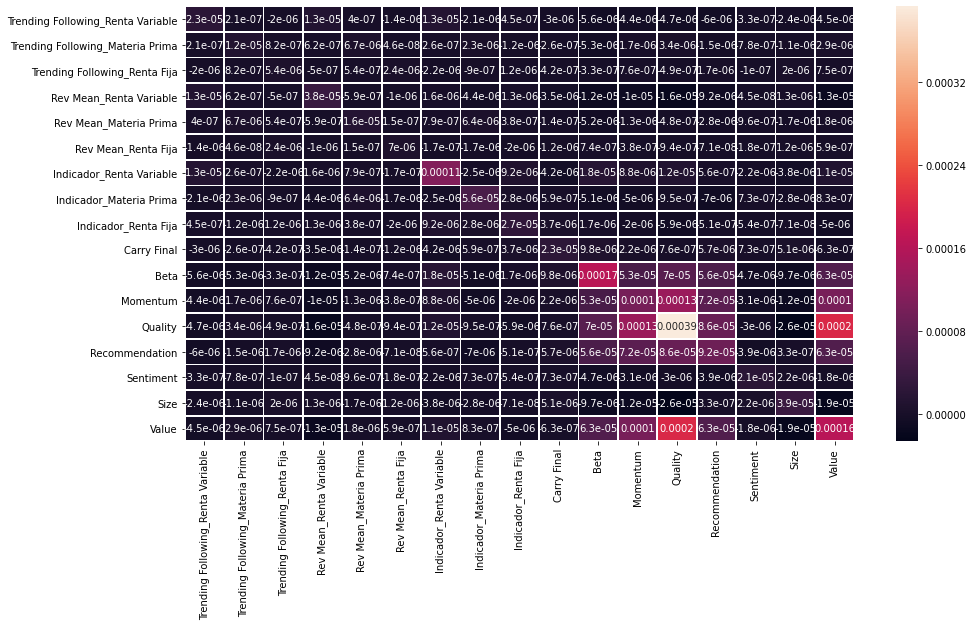

In [20]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(cov, linewidth=0.8, annot = True)
plt.show()

Estudiamos además la contribución del riesgo a cada activo:

In [21]:
def risk_contribution(w,C):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    port_variance = np.dot(w.T, np.dot(C, w))
    # Marginal contribution of each constituent
    marginal_contrib = C@w
    risk_contrib = np.multiply(marginal_contrib,w.T)/port_variance
    return risk_contrib

In [22]:
risk_contrib = risk_contribution(w, C)
risk_contrib

array([ 1.08350527e-03,  2.73762086e-03,  3.61971492e-04, -1.97295727e-03,
        2.37413061e-03, -1.19448525e-04,  1.25499403e-02,  9.78884550e-04,
        4.10064188e-04,  1.50684682e-03,  5.00457344e-02,  1.05722262e-01,
        5.55245521e-01,  6.93058982e-02, -8.98058218e-04, -6.46039551e-03,
        2.07128480e-01])

In [23]:
rend = w * r * 252
rend

array([ 2.74615097e-03,  3.82080006e-03,  8.99284477e-05,  4.34271663e-02,
        9.96724011e-03,  7.95037296e-04,  1.67775545e-03,  1.34596851e-03,
        2.18201923e-03, -8.99362404e-05,  4.76543704e-03,  1.27980714e-02,
        6.85280482e-02,  1.01857785e-02,  1.54655630e-03, -5.63601277e-04,
        2.68868667e-02])

In [24]:
rendimiento = pd.DataFrame(rend, columns = ['Rendimiento'], index = ['Trending Following_Renta Variable', 'Trending Following_Materia Prima', 
                                 'Trending Following_Renta Fija', 'Rev Mean_Renta Variable', 'Rev Mean_Materia Prima',
                                 'Rev Mean_Renta Fija', 'Indicador_Renta Variable', 'Indicador_Materia Prima',
                                 'Indicador_Renta Fija', 'Carry Final', 'Beta', 'Momentum', 'Quality', 'Recommendation', 
                                                                     'Sentiment', 'Size', 'Value'])
rendimiento['Riesgo'] = risk_contrib.tolist()
rendimiento

,Rendimiento,Riesgo
Trending Following_Renta Variable,0.002746,0.001084
Trending Following_Materia Prima,0.003821,0.002738
Trending Following_Renta Fija,0.000090,0.000362
Rev Mean_Renta Variable,0.043427,-0.001973
Rev Mean_Materia Prima,0.009967,0.002374
Rev Mean_Renta Fija,0.000795,-0.000119
Indicador_Renta Variable,0.001678,0.012550
Indicador_Materia Prima,0.001346,0.000979
Indicador_Renta Fija,0.002182,0.000410
Carry Final,-0.000090,0.001507


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado.

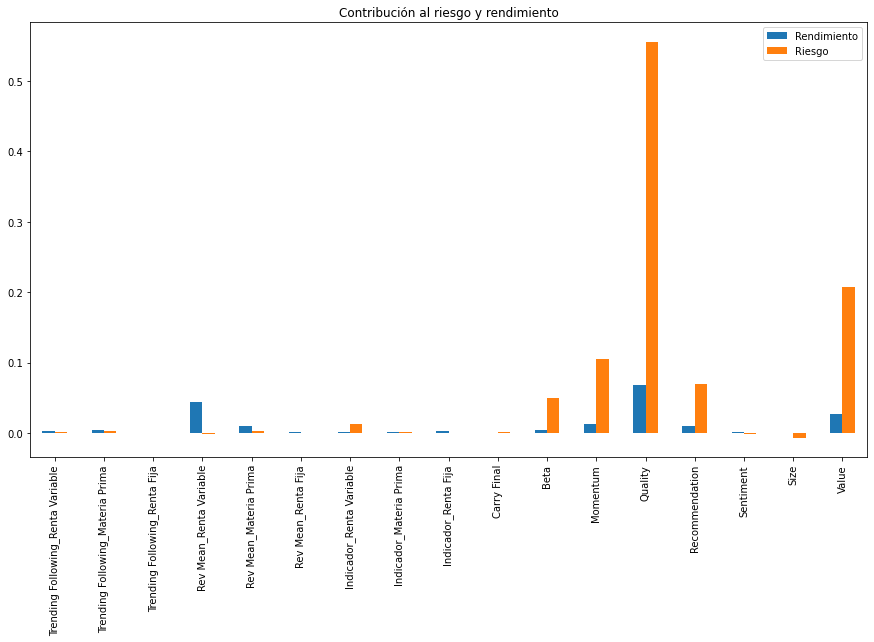

In [25]:
rendimiento.plot.bar(title = "Contribución al riesgo y rendimiento", figsize = (15, 8))

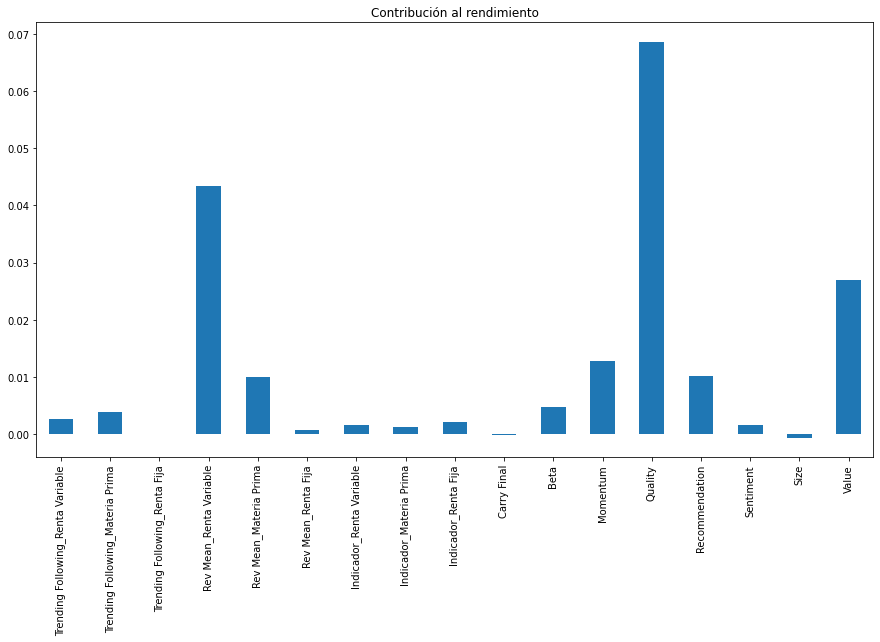

In [26]:
rendimiento.Rendimiento.plot.bar(title = "Contribución al rendimiento", figsize = (15, 8))

Por último, generamos un gráfico que muestre todas las carteraas aleatorias generadas, que seleccione la que considera la mejor y muestre la frontera eficiente, que vemos de forma más clara con la tangente.

In [27]:
import random
random.seed(12345)
results = np.zeros((4+len(df.columns)-1,200000))
for i in range(200000):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(17))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(r * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(C, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',df.columns[0],df.columns[1],df.columns[2],df.columns[3],
                                               df.columns[4],df.columns[5],df.columns[6],df.columns[7],df.columns[8],df.columns[9],
                                               df.columns[10],df.columns[11],df.columns[12],df.columns[13],
                                               df.columns[14],df.columns[15],df.columns[16]])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [28]:
results_frame['stdev'].min()

0.02312957763657076

In [29]:
results_frame['stdev'].max()

0.11941388361976321

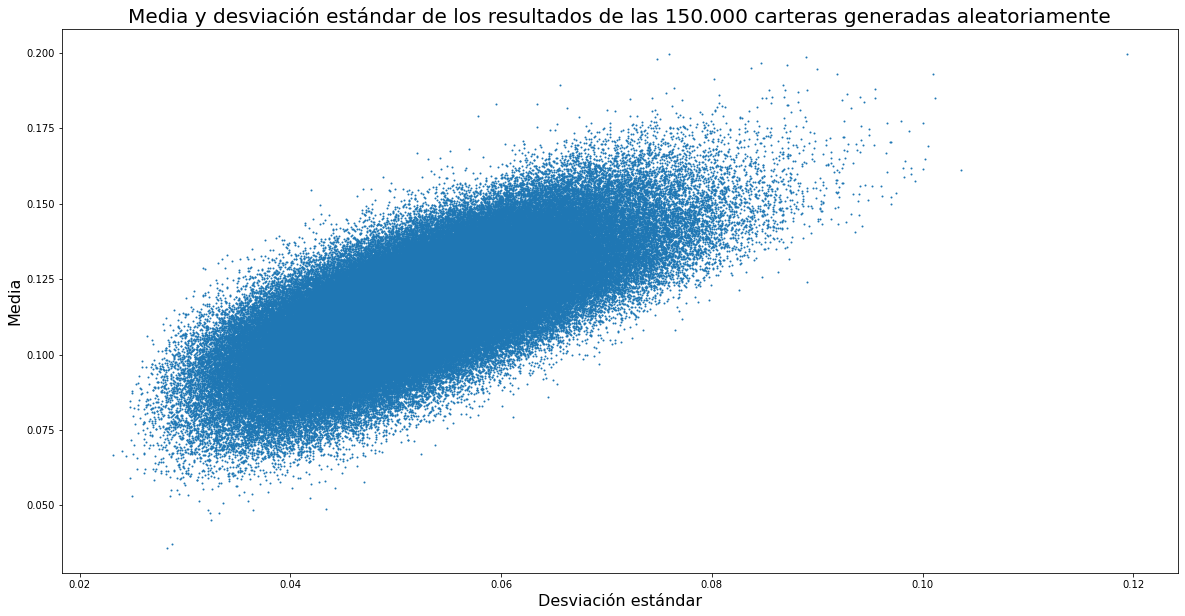

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(results_frame['stdev'], results_frame['ret'], 'o', markersize=1)
plt.xlabel('Desviación estándar', fontsize=16)
plt.ylabel('Media', fontsize=16)
plt.title('Media y desviación estándar de los resultados de las 150.000 carteras generadas aleatoriamente', fontsize=20);

## CARTERA CONSERVADORA 

Buscamos las carteras que tengan una volatilidad inferior a 0.03 para generar la cartera conservadora, pero existen 651 estrategias así. Por ello, decidimos elegir la estrategia que mejor rentabilidad aporte. 

In [31]:
results_frame_conservadora = results_frame[results_frame['stdev'] < 0.03]
results_frame_conservadora

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
144,0.089521,0.028046,3.191953,0.113258,0.034622,0.102647,0.099141,0.085571,0.052563,0.019771,0.087653,0.077848,0.014770,0.064880,0.010948,0.020622,0.020075,0.079527,0.112015,0.004089
515,0.079351,0.028386,2.795399,0.058652,0.039599,0.120623,0.082462,0.019503,0.125149,0.061095,0.112192,0.108125,0.013259,0.003445,0.020518,0.001842,0.011572,0.103514,0.060669,0.057782
1083,0.090662,0.025535,3.550432,0.108878,0.108063,0.080045,0.099051,0.081119,0.091678,0.020582,0.043140,0.113619,0.107630,0.018245,0.017747,0.010503,0.004938,0.021004,0.045865,0.027892
1202,0.079995,0.029289,2.731262,0.064668,0.068983,0.077831,0.038988,0.080099,0.075445,0.003636,0.079501,0.093165,0.088714,0.033411,0.022043,0.011094,0.028101,0.098207,0.080766,0.055349
1534,0.092085,0.029178,3.155980,0.026151,0.112607,0.060040,0.060086,0.116092,0.140941,0.009019,0.028070,0.054734,0.101248,0.056076,0.010396,0.037997,0.012375,0.136180,0.022734,0.015253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197674,0.092184,0.029670,3.106978,0.093666,0.077315,0.097771,0.098538,0.035075,0.063006,0.066345,0.057717,0.095185,0.040193,0.019097,0.037588,0.011779,0.066562,0.083116,0.049201,0.007846
199032,0.085167,0.029601,2.877187,0.132602,0.005802,0.127624,0.072078,0.110528,0.080475,0.058902,0.133251,0.047139,0.034222,0.007132,0.011951,0.008568,0.001625,0.129688,0.000845,0.037567
199357,0.099318,0.029872,3.324763,0.049324,0.129935,0.031496,0.133715,0.078488,0.033971,0.076945,0.076100,0.103943,0.118376,0.000805,0.020982,0.003115,0.017973,0.024596,0.071234,0.029001
199590,0.102852,0.029664,3.467275,0.010446,0.079373,0.136003,0.104073,0.157646,0.023595,0.016984,0.106997,0.036512,0.086567,0.014761,0.025023,0.006422,0.082117,0.054923,0.041167,0.017391


In [32]:
maximo_rendimiento_cons = results_frame_conservadora['ret'].max()
cartera_conservadora = results_frame_conservadora[results_frame_conservadora['ret'] == maximo_rendimiento_cons]
cartera_conservadora

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
64503,0.114947,0.028966,3.96836,0.099288,0.11738,0.070442,0.122324,0.110355,0.112999,0.007297,0.012943,0.08835,0.032315,0.002534,0.000815,0.019436,0.082251,0.031087,0.054487,0.035698


In [33]:
pesos_conservadora = cartera_conservadora.iloc[0,3:]

Para terminar el estudio, creamos una nueva variable con la cartera final aplicando la combinación de todos los activos y estraetgias en base a los pesos óptimos y la comparamos con los tres activos y las tres estrategias que lo analizan, además de la estrategia de carry.

In [34]:
cartera_final_cons = datos*pesos_conservadora
cartera_final_cons['Suma'] = cartera_final_cons.sum(axis = 1)
cartera_final_cons

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
index,,,,,,,,,,,,,,,,,,
2015-05-01,9.928810,11.737956,7.044177,12.232365,11.035510,11.299880,0.729666,1.294296,8.834992,3.231487,0.253357,0.081489,1.943590,8.225118,3.108720,5.448745,3.569841,100.000000
2015-05-05,9.916850,11.689073,7.046847,12.232365,11.035510,11.299880,0.732517,1.312279,8.823641,3.258106,0.253175,0.082240,1.940057,8.183416,3.096688,5.395014,3.547295,99.844953
2015-05-06,9.860272,11.742324,7.016665,12.232365,11.035510,11.299880,0.746447,1.292351,8.949615,3.261323,0.251318,0.082037,1.939157,8.166615,3.098060,5.387065,3.508165,99.869169
2015-05-07,9.894980,11.740314,7.017407,12.232365,11.035510,11.275969,0.737689,1.293089,8.930677,3.241870,0.252628,0.082409,1.926571,8.225267,3.091790,5.394117,3.504655,99.877306
2015-05-08,9.999181,11.707321,7.001738,12.232365,11.035510,11.192043,0.722152,1.305202,8.864207,3.256113,0.249441,0.081879,1.920036,8.197248,3.112513,5.441958,3.482474,99.801379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,12.844265,16.443797,7.093288,48.236335,21.133577,12.343522,0.829176,1.478747,10.809422,3.151256,0.361295,0.173074,9.660425,16.109220,3.656867,4.856636,10.543363,179.724267
2019-09-24,12.814540,16.437449,7.093654,48.236335,21.133577,12.343522,0.822780,1.484456,10.803845,3.155810,0.355383,0.171331,9.590674,15.962513,3.638294,4.853003,10.480160,179.377326
2019-09-25,12.865121,16.455944,7.103284,48.236335,21.133577,12.343522,0.833606,1.467753,10.901621,3.152171,0.365607,0.172534,9.711369,16.132640,3.610345,4.883759,10.598440,179.967628


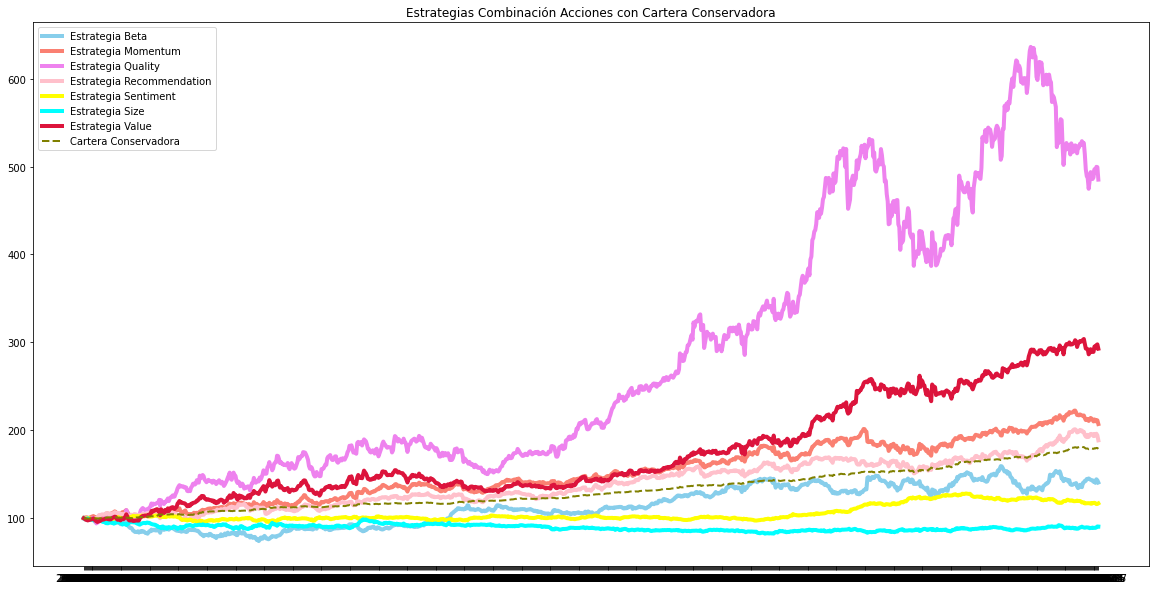

In [35]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Beta')
plt.plot(datos.index, datos['Momentum'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Estrategia Momentum')
plt.plot(datos.index, datos['Quality'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos.index, datos['Recommendation'], marker='', markerfacecolor='blue', markersize=12, color='pink', 
         linewidth=4, label = 'Estrategia Recommendation')
plt.plot(datos.index, datos['Sentiment'], marker='', markerfacecolor='salmon', markersize=12, color='yellow', 
         linewidth=4, label = 'Estrategia Sentiment')
plt.plot(datos.index, datos['Size'], marker='', markerfacecolor='violet', markersize=12, color='cyan', 
         linewidth=4, label = 'Estrategia Size')
plt.plot(datos.index, datos['Value'], marker='', markerfacecolor='violet', markersize=12, color='crimson', 
         linewidth=4, label = 'Estrategia Value')
plt.plot(cartera_final_cons.index, cartera_final_cons['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', 
         label = "Cartera Conservadora")
plt.title('Estrategias Combinación Acciones con Cartera Conservadora')
plt.legend()

In [36]:
risk_contrib_cons = risk_contribution(pesos_conservadora, C)
rend_cons = pesos_conservadora * r * 252
rendimiento_cons = pd.DataFrame()

In [37]:
rendimiento_cons['Rendimiento'] = rend_cons
rendimiento_cons['Riesgo'] = risk_contrib_cons.tolist()
rendimiento_cons['Pesos'] = cartera_conservadora.T
rendimiento_cons

,Rendimiento,Riesgo,Pesos
Trending Following_Renta Variable,0.006402,0.081485,0.099288
Trending Following_Materia Prima,0.009704,0.075507,0.117380
Trending Following_Renta Fija,0.000191,0.018781,0.070442
Rev Mean_Renta Variable,0.040883,0.154586,0.122324
Rev Mean_Materia Prima,0.017431,0.077859,0.110355
Rev Mean_Renta Fija,0.002496,0.018489,0.112999
Indicador_Renta Variable,0.000327,0.007388,0.007297
Indicador_Materia Prima,0.000468,0.000896,0.012943
Indicador_Renta Fija,0.004745,0.060170,0.088350
Carry Final,-0.000090,0.008868,0.032315


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado.

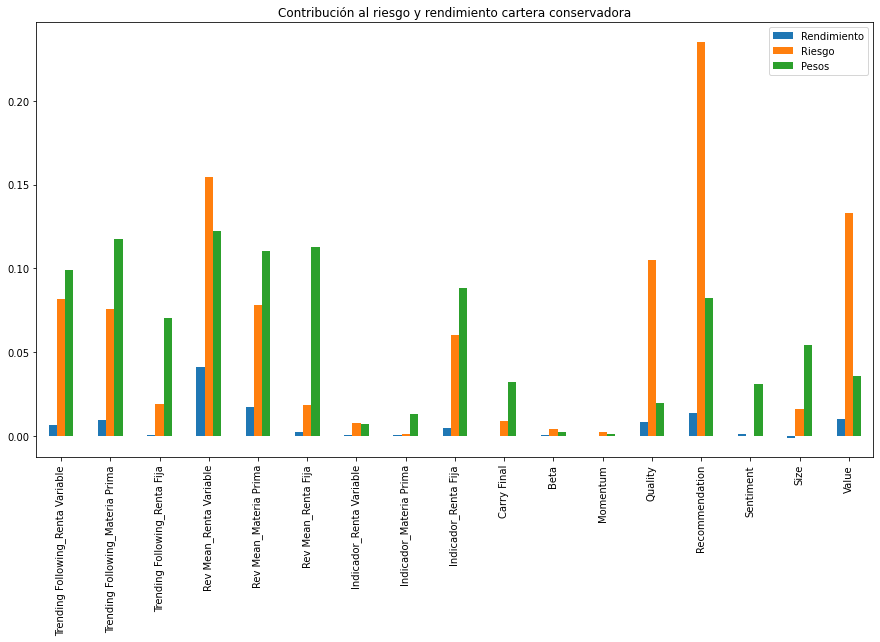

In [38]:
rendimiento_cons.plot.bar(title = "Contribución al riesgo y rendimiento cartera conservadora", figsize = (15, 8))

### Beta conservadora

In [39]:
rentabilidades_conserv = cartera_final_cons.pct_change().dropna()

In [40]:
beta_cons = rentabilidades_conserv.cov().div(rentabilidades_conserv.var())
beta_cons

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
Trending Following_Renta Variable,1.000000,0.017855,-0.361152,0.339205,0.025739,-0.204508,0.119166,-0.037827,0.016471,-0.127129,-0.033262,-0.043789,-0.011899,-0.065297,-0.016058,-0.061101,-0.027569,0.577640
Trending Following_Materia Prima,0.009123,1.000000,0.151233,0.016291,0.424134,0.006599,0.002299,0.040728,-0.043048,-0.011043,-0.031808,0.017008,0.008617,-0.016407,-0.037840,-0.028308,0.017772,0.407727
Trending Following_Renta Fija,-0.085099,0.069745,1.000000,-0.013286,0.034046,0.344806,-0.019600,-0.016163,0.045477,-0.018224,-0.001970,0.007537,-0.001246,0.018959,-0.004847,0.050545,0.004549,0.134750
Rev Mean_Renta Variable,0.559279,0.052571,-0.092967,1.000000,-0.037639,-0.142091,0.014008,-0.078441,0.046656,-0.149068,-0.070017,-0.101429,-0.041826,-0.100769,-0.002205,0.034215,-0.079661,1.082762
Rev Mean_Materia Prima,0.017628,0.568530,0.098959,-0.015635,1.000000,0.022008,0.007015,0.114503,0.013884,-0.005875,-0.030918,-0.012620,-0.001225,-0.030426,-0.046718,-0.043374,0.010894,0.466098
Rev Mean_Renta Fija,-0.062619,0.003954,0.448057,-0.026387,0.009839,1.000000,-0.001521,-0.029646,-0.071539,-0.052416,0.004408,-0.003733,-0.002384,-0.000770,-0.008729,0.030393,0.003577,0.069065
Indicador_Renta Variable,0.581989,0.021977,-0.406252,0.041493,0.050024,-0.024256,1.000000,-0.044342,0.335085,-0.180805,0.109260,0.087214,0.031105,0.006159,-0.106187,-0.098295,0.065413,0.649013
Indicador_Materia Prima,-0.091909,0.193680,-0.166664,-0.115595,0.406218,-0.235256,-0.022060,1.000000,0.101445,0.025501,-0.030277,-0.049530,-0.002418,-0.076731,0.035237,-0.072426,0.005016,0.035149
Indicador_Renta Fija,0.019690,-0.100718,0.230715,0.033827,0.024233,-0.279297,0.082018,0.049910,1.000000,0.157815,0.010370,-0.019664,-0.014931,-0.005589,-0.026386,-0.001829,-0.030060,0.321471
Carry Final,-0.128824,-0.021901,-0.078374,-0.091616,-0.008692,-0.173469,-0.037514,0.010635,0.133778,1.000000,0.058837,0.022069,0.001926,0.062234,0.035323,0.132350,-0.003834,0.127544


In [41]:
betas = pd.DataFrame(beta_cons.iloc[:-1,-1])
betas.columns = ['Beta_cons']
betas

,Beta_cons
Trending Following_Renta Variable,0.577640
Trending Following_Materia Prima,0.407727
Trending Following_Renta Fija,0.134750
Rev Mean_Renta Variable,1.082762
Rev Mean_Materia Prima,0.466098
Rev Mean_Renta Fija,0.069065
Indicador_Renta Variable,0.649013
Indicador_Materia Prima,0.035149
Indicador_Renta Fija,0.321471
Carry Final,0.127544


## CARTERA MODERADA

Buscamos las carteras que tengan una volatilidad inferior a 0.05 y mayor que 0.04 para generar la cartera conservadora, pero existen 63496  estrategias así. Por ello, decidimos elegir la estrategia que mejor rentabilidad aporte. 

In [42]:
intermedio = (results_frame['stdev'] > 0.04) & (results_frame['stdev'] < 0.05)
results_frame_moderada = results_frame[intermedio]
results_frame_moderada

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
5,0.113002,0.044277,2.552173,0.010198,0.052898,0.013602,0.064495,0.096278,0.132248,0.025655,0.072455,0.052073,0.019333,0.059180,0.028436,0.010615,0.043157,0.107814,0.082613,0.128951
10,0.103805,0.042998,2.414171,0.081418,0.072872,0.101349,0.087199,0.000506,0.004841,0.005128,0.101865,0.088959,0.088247,0.066650,0.075198,0.012056,0.000251,0.044776,0.068837,0.099848
11,0.103905,0.048161,2.157473,0.084662,0.082759,0.080785,0.014501,0.059914,0.055766,0.047223,0.053057,0.085330,0.072233,0.057183,0.010126,0.082124,0.046652,0.085761,0.031836,0.050087
12,0.117189,0.048882,2.397382,0.117182,0.118967,0.019836,0.042601,0.068844,0.058430,0.083646,0.114707,0.059079,0.019772,0.025807,0.051485,0.049576,0.024758,0.052518,0.010938,0.081853
13,0.117867,0.048316,2.439522,0.018700,0.105477,0.092515,0.123432,0.047809,0.020504,0.039945,0.011997,0.123370,0.116654,0.134187,0.079300,0.032242,0.007677,0.006819,0.017069,0.022302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199990,0.090140,0.045148,1.996563,0.088539,0.024946,0.106170,0.054169,0.003124,0.096149,0.065756,0.093195,0.018713,0.060369,0.060515,0.060327,0.019261,0.106348,0.013118,0.085932,0.043370
199993,0.117465,0.049946,2.351838,0.057386,0.096411,0.026874,0.059617,0.044738,0.056263,0.095436,0.040813,0.078219,0.011941,0.041020,0.059909,0.094067,0.051581,0.092025,0.088950,0.004748
199994,0.107421,0.045178,2.377717,0.031113,0.051665,0.072776,0.064188,0.068824,0.081034,0.025207,0.094469,0.039514,0.090341,0.078504,0.037103,0.058676,0.061046,0.064493,0.050220,0.030826
199996,0.111121,0.047180,2.355279,0.090511,0.062063,0.093114,0.054689,0.069893,0.057810,0.061685,0.072771,0.079058,0.009535,0.090206,0.011292,0.036523,0.060682,0.042241,0.030485,0.077442


In [43]:
maximo_rendimiento_mod = results_frame_moderada['ret'].max()
cartera_moderada = results_frame_moderada[results_frame_moderada['ret'] == maximo_rendimiento_mod]
cartera_moderada

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
76408,0.158914,0.048826,3.254697,0.102854,0.003703,0.022283,0.162995,0.149195,0.008063,0.00129,0.053697,0.072097,0.064817,0.001075,0.055752,0.077898,0.109787,0.013131,0.076353,0.025008


In [44]:
pesos_moderada = cartera_moderada.iloc[0,3:]

Para terminar el estudio, creamos una nueva variable con la cartera final aplicando la combinación de todos los activos y estraetgias en base a los pesos óptimos y la comparamos con los tres activos y las tres estrategias que lo analizan, además de la estrategia de carry.

In [45]:
cartera_final_mod = datos*pesos_moderada
cartera_final_mod['Suma'] = cartera_final_mod.sum(axis = 1)
cartera_final_mod

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
index,,,,,,,,,,,,,,,,,,
2015-05-01,10.285433,0.370322,2.228335,16.299493,14.919516,0.806273,0.129022,5.369736,7.209696,6.481713,0.107486,5.575242,7.789811,10.978687,1.313150,7.635255,2.500831,100.000000
2015-05-05,10.273043,0.368779,2.229180,16.299493,14.919516,0.806273,0.129526,5.444344,7.200433,6.535105,0.107409,5.626657,7.775651,10.923024,1.308067,7.559963,2.485036,99.991499
2015-05-06,10.214433,0.370459,2.219632,16.299493,14.919516,0.806273,0.131989,5.361669,7.303232,6.541557,0.106621,5.612790,7.772043,10.900598,1.308647,7.548823,2.457624,99.875400
2015-05-07,10.250389,0.370396,2.219867,16.299493,14.919516,0.804567,0.130441,5.364729,7.287778,6.502540,0.107177,5.638208,7.721598,10.978885,1.305998,7.558705,2.455165,99.915451
2015-05-08,10.358332,0.369355,2.214910,16.299493,14.919516,0.798578,0.127693,5.414983,7.233536,6.531107,0.105825,5.601927,7.695406,10.941486,1.314752,7.625744,2.439627,99.992270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,13.305606,0.518787,2.243871,64.274392,28.571651,0.880739,0.146618,6.134982,8.820907,6.320785,0.153279,11.841312,38.718497,21.502193,1.544691,6.805540,7.386090,219.169940
2019-09-24,13.274813,0.518586,2.243987,64.274392,28.571651,0.880739,0.145487,6.158667,8.816356,6.329920,0.150770,11.722065,38.438938,21.306372,1.536846,6.800450,7.341814,218.511853
2019-09-25,13.327211,0.519170,2.247033,64.274392,28.571651,0.880739,0.147401,6.089369,8.896145,6.322620,0.155108,11.804365,38.922677,21.533453,1.525040,6.843547,7.424674,219.484595


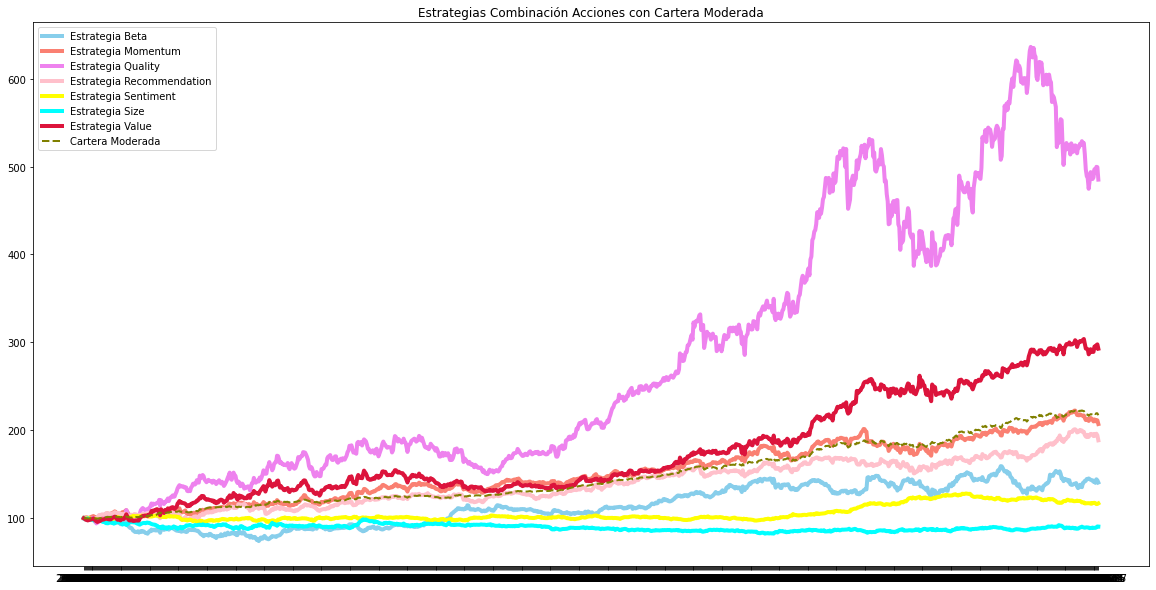

In [46]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Beta')
plt.plot(datos.index, datos['Momentum'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Estrategia Momentum')
plt.plot(datos.index, datos['Quality'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos.index, datos['Recommendation'], marker='', markerfacecolor='blue', markersize=12, color='pink', 
         linewidth=4, label = 'Estrategia Recommendation')
plt.plot(datos.index, datos['Sentiment'], marker='', markerfacecolor='salmon', markersize=12, color='yellow', 
         linewidth=4, label = 'Estrategia Sentiment')
plt.plot(datos.index, datos['Size'], marker='', markerfacecolor='violet', markersize=12, color='cyan', 
         linewidth=4, label = 'Estrategia Size')
plt.plot(datos.index, datos['Value'], marker='', markerfacecolor='violet', markersize=12, color='crimson', 
         linewidth=4, label = 'Estrategia Value')
plt.plot(cartera_final_mod.index, cartera_final_mod['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed',
         label="Cartera Moderada")
plt.title('Estrategias Combinación Acciones con Cartera Moderada')
plt.legend()

In [47]:
risk_contrib_mod = risk_contribution(pesos_moderada, C)
rend_mod = pesos_moderada * r * 252
rendimiento_mod = pd.DataFrame()

In [48]:
rendimiento_mod['Rendimiento'] = rend_mod
rendimiento_mod['Riesgo'] = risk_contrib_mod.tolist()
rendimiento_mod['Pesos'] = cartera_moderada.T
rendimiento_mod

,Rendimiento,Riesgo,Pesos
Trending Following_Renta Variable,0.006632,0.028643,0.102854
Trending Following_Materia Prima,0.000306,0.000535,0.003703
Trending Following_Renta Fija,0.000060,0.000738,0.022283
Rev Mean_Renta Variable,0.054476,0.067541,0.162995
Rev Mean_Materia Prima,0.023566,0.034318,0.149195
Rev Mean_Renta Fija,0.000178,-0.000413,0.008063
Indicador_Renta Variable,0.000058,0.000487,0.001290
Indicador_Materia Prima,0.001943,0.010876,0.053697
Indicador_Renta Fija,0.003872,0.014791,0.072097
Carry Final,-0.000181,0.014359,0.064817


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado.

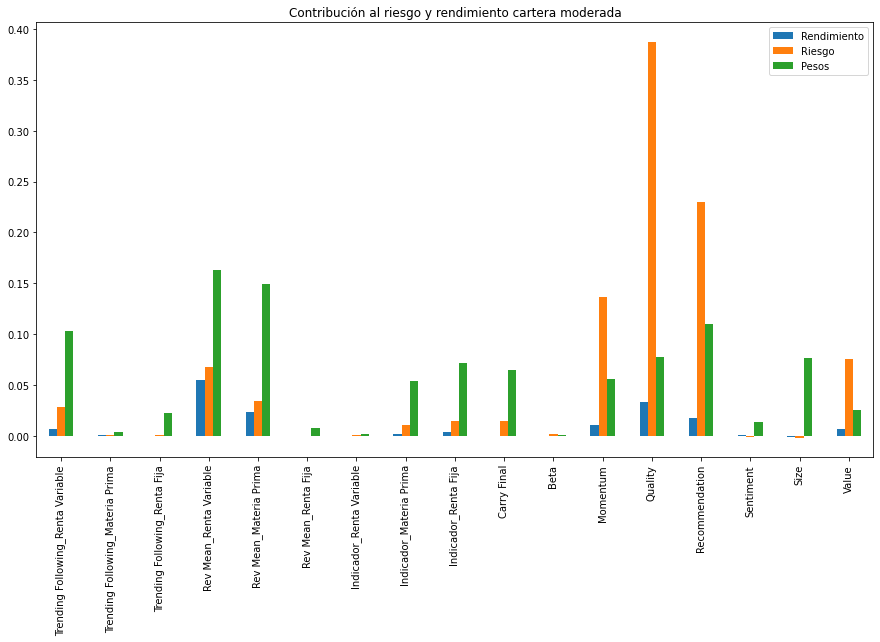

In [49]:
rendimiento_mod.plot.bar(title = "Contribución al riesgo y rendimiento cartera moderada", figsize = (15, 8))

### Beta moderada

In [50]:
rentabilidades_mod = cartera_final_mod.pct_change().dropna()

In [51]:
beta_mod = rentabilidades_mod.cov().div(rentabilidades_mod.var())
beta_mod

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
Trending Following_Renta Variable,1.000000,0.017855,-0.361152,0.339205,0.025739,-0.204508,0.119166,-0.037827,0.016471,-0.127129,-0.033262,-0.043789,-0.011899,-0.065297,-0.016058,-0.061101,-0.027569,0.139651
Trending Following_Materia Prima,0.009123,1.000000,0.151233,0.016291,0.424134,0.006599,0.002299,0.040728,-0.043048,-0.011043,-0.031808,0.017008,0.008617,-0.016407,-0.037840,-0.028308,0.017772,0.085160
Trending Following_Renta Fija,-0.085099,0.069745,1.000000,-0.013286,0.034046,0.344806,-0.019600,-0.016163,0.045477,-0.018224,-0.001970,0.007537,-0.001246,0.018959,-0.004847,0.050545,0.004549,0.011757
Rev Mean_Renta Variable,0.559279,0.052571,-0.092967,1.000000,-0.037639,-0.142091,0.014008,-0.078441,0.046656,-0.149068,-0.070017,-0.101429,-0.041826,-0.100769,-0.002205,0.034215,-0.079661,0.235358
Rev Mean_Materia Prima,0.017628,0.568530,0.098959,-0.015635,1.000000,0.022008,0.007015,0.114503,0.013884,-0.005875,-0.030918,-0.012620,-0.001225,-0.030426,-0.046718,-0.043374,0.010894,0.122491
Rev Mean_Renta Fija,-0.062619,0.003954,0.448057,-0.026387,0.009839,1.000000,-0.001521,-0.029646,-0.071539,-0.052416,0.004408,-0.003733,-0.002384,-0.000770,-0.008729,0.030393,0.003577,-0.023464
Indicador_Renta Variable,0.581989,0.021977,-0.406252,0.041493,0.050024,-0.024256,1.000000,-0.044342,0.335085,-0.180805,0.109260,0.087214,0.031105,0.006159,-0.106187,-0.098295,0.065413,0.245676
Indicador_Materia Prima,-0.091909,0.193680,-0.166664,-0.115595,0.406218,-0.235256,-0.022060,1.000000,0.101445,0.025501,-0.030277,-0.049530,-0.002418,-0.076731,0.035237,-0.072426,0.005016,0.085983
Indicador_Renta Fija,0.019690,-0.100718,0.230715,0.033827,0.024233,-0.279297,0.082018,0.049910,1.000000,0.157815,0.010370,-0.019664,-0.014931,-0.005589,-0.026386,-0.001829,-0.030060,0.050407
Carry Final,-0.128824,-0.021901,-0.078374,-0.091616,-0.008692,-0.173469,-0.037514,0.010635,0.133778,1.000000,0.058837,0.022069,0.001926,0.062234,0.035323,0.132350,-0.003834,0.088656


In [52]:
betas['Beta_mod'] = beta_mod['Beta']
betas

,Beta_cons,Beta_mod
Trending Following_Renta Variable,0.577640,-0.033262
Trending Following_Materia Prima,0.407727,-0.031808
Trending Following_Renta Fija,0.134750,-0.001970
Rev Mean_Renta Variable,1.082762,-0.070017
Rev Mean_Materia Prima,0.466098,-0.030918
Rev Mean_Renta Fija,0.069065,0.004408
Indicador_Renta Variable,0.649013,0.109260
Indicador_Materia Prima,0.035149,-0.030277
Indicador_Renta Fija,0.321471,0.010370
Carry Final,0.127544,0.058837


## CARTERA AGRESIVA

Buscamos las carteras que tengan una volatilidad superior que 0.10 para generar la cartera conservadora, pero existen 8 estrategias así. Por ello, decidimos elegir la estrategia que mejor rentabilidad aporte. 

In [53]:
results_frame_agresiva = results_frame[results_frame['stdev'] > 0.1]
results_frame_agresiva

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
42743,0.169265,0.100530,1.683723,0.000797,0.022956,0.045274,0.051932,0.001550,0.040783,0.010017,0.017607,0.024977,0.142694,0.033923,0.129283,0.121689,0.151791,0.015521,0.038493,0.150715
50466,0.185094,0.101188,1.829218,0.048582,0.078867,0.077890,0.055421,0.067632,0.024316,0.009017,0.020423,0.001538,0.012139,0.105916,0.147968,0.128007,0.060615,0.016519,0.000852,0.144299
53924,0.161166,0.103667,1.554656,0.004715,0.004119,0.032541,0.015538,0.025473,0.055176,0.031843,0.009488,0.027818,0.036556,0.132696,0.098583,0.135201,0.108566,0.030341,0.108546,0.142800
88946,0.199688,0.119414,1.672233,0.051575,0.023354,0.035885,0.000905,0.092543,0.023949,0.106146,0.026158,0.047185,0.026367,0.002694,0.013204,0.287978,0.022867,0.086221,0.017877,0.135091
89325,0.164950,0.100199,1.646220,0.020304,0.041954,0.020594,0.003920,0.046726,0.038896,0.070608,0.056843,0.020577,0.073165,0.060335,0.053151,0.122868,0.061980,0.045156,0.032359,0.230566
91160,0.193126,0.100980,1.912511,0.000522,0.049249,0.002513,0.071181,0.087124,0.060382,0.027189,0.076220,0.002449,0.017807,0.054998,0.147489,0.123032,0.146285,0.003948,0.000763,0.128848
92773,0.176846,0.100027,1.767980,0.009346,0.010396,0.000680,0.024140,0.146265,0.031650,0.083688,0.030913,0.005804,0.004420,0.152024,0.094012,0.127408,0.042008,0.075182,0.015429,0.146634
189226,0.161574,0.100019,1.615426,0.004942,0.001865,0.014068,0.003619,0.085472,0.173319,0.029771,0.054461,0.007714,0.040826,0.135901,0.113212,0.176598,0.032613,0.021680,0.024072,0.079867


In [54]:
maximo_rendimiento_agr = results_frame_agresiva['ret'].max()
cartera_agresiva = results_frame_agresiva[results_frame_agresiva['ret'] == maximo_rendimiento_agr]
cartera_agresiva

,ret,stdev,sharpe,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value
88946,0.199688,0.119414,1.672233,0.051575,0.023354,0.035885,0.000905,0.092543,0.023949,0.106146,0.026158,0.047185,0.026367,0.002694,0.013204,0.287978,0.022867,0.086221,0.017877,0.135091


In [55]:
pesos_final_agr = cartera_agresiva.iloc[0,3:]

Para terminar el estudio, creamos una nueva variable con la cartera final aplicando la combinación de todos los activos y estraetgias en base a los pesos óptimos y la comparamos con los tres activos y las tres estrategias que lo analizan, además de la estrategia de carry.

In [56]:
cartera_final_agr = datos*pesos_final_agr
cartera_final_agr['Suma'] = cartera_final_agr.sum(axis = 1)
cartera_final_agr

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
index,,,,,,,,,,,,,,,,,,
2015-05-01,5.157538,2.335402,3.588531,0.090528,9.254300,2.394917,10.614551,2.615836,4.718474,2.636686,0.269407,1.320391,28.797810,2.286748,8.622115,1.787704,13.509061,100.000000
2015-05-05,5.151325,2.325676,3.589891,0.090528,9.254300,2.394917,10.656024,2.652181,4.712411,2.658405,0.269214,1.332568,28.745464,2.275154,8.588745,1.770076,13.423740,99.890619
2015-05-06,5.121936,2.336271,3.574516,0.090528,9.254300,2.394917,10.858674,2.611906,4.779690,2.661030,0.267239,1.329284,28.732127,2.270483,8.592550,1.767467,13.275662,99.918578
2015-05-07,5.139965,2.335871,3.574894,0.090528,9.254300,2.389849,10.731265,2.613397,4.769576,2.645158,0.268632,1.335304,28.545638,2.286789,8.575159,1.769781,13.262382,99.588487
2015-05-08,5.194092,2.329307,3.566911,0.090528,9.254300,2.372062,10.505249,2.637877,4.734076,2.656778,0.265244,1.326711,28.448808,2.278999,8.632635,1.785477,13.178445,99.257501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,6.671976,3.271684,3.613550,0.356984,17.722466,2.616108,12.062147,2.988621,5.772951,2.571222,0.384184,2.804392,143.136718,4.478686,10.142414,1.593437,39.898393,260.085932
2019-09-24,6.656535,3.270420,3.613737,0.356984,17.722466,2.616108,11.969095,3.000159,5.769972,2.574938,0.377897,2.776151,142.103231,4.437899,10.090902,1.592245,39.659218,258.587957
2019-09-25,6.682810,3.274100,3.618642,0.356984,17.722466,2.616108,12.126576,2.966401,5.822191,2.571968,0.388769,2.795642,143.891542,4.485197,10.013385,1.602335,40.106815,261.041934


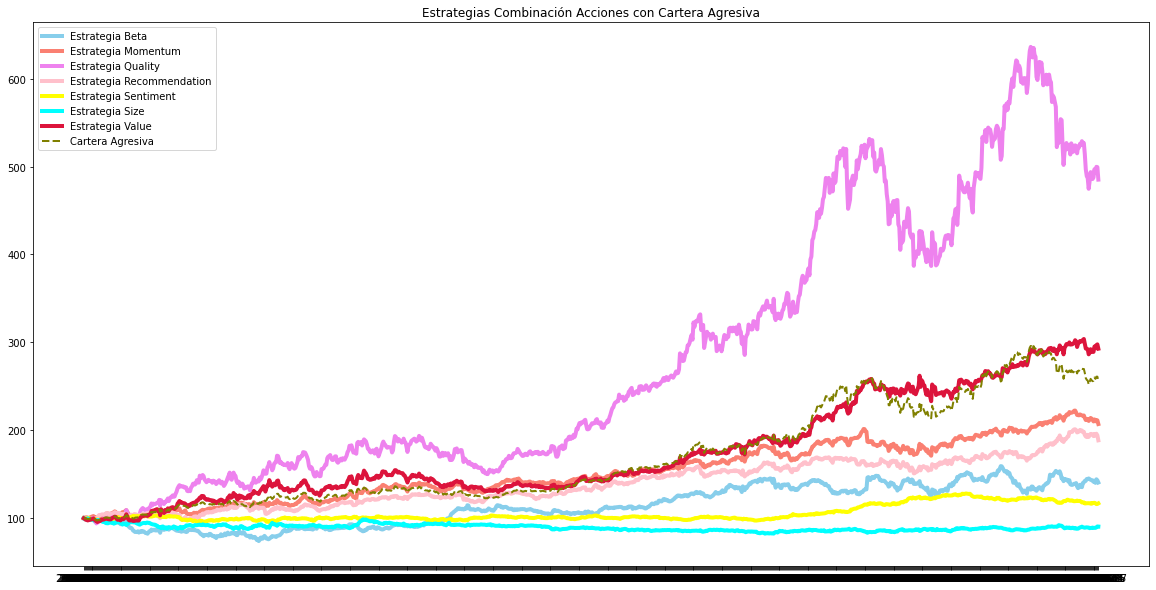

In [57]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Beta')
plt.plot(datos.index, datos['Momentum'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Estrategia Momentum')
plt.plot(datos.index, datos['Quality'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos.index, datos['Recommendation'], marker='', markerfacecolor='blue', markersize=12, color='pink', 
         linewidth=4, label = 'Estrategia Recommendation')
plt.plot(datos.index, datos['Sentiment'], marker='', markerfacecolor='salmon', markersize=12, color='yellow', 
         linewidth=4, label = 'Estrategia Sentiment')
plt.plot(datos.index, datos['Size'], marker='', markerfacecolor='violet', markersize=12, color='cyan', 
         linewidth=4, label = 'Estrategia Size')
plt.plot(datos.index, datos['Value'], marker='', markerfacecolor='violet', markersize=12, color='crimson', 
         linewidth=4, label = 'Estrategia Value')
plt.plot(cartera_final_agr.index, cartera_final_agr['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', 
         label="Cartera Agresiva")
plt.title('Estrategias Combinación Acciones con Cartera Agresiva')
plt.legend()

In [58]:
risk_contrib_agr = risk_contribution(pesos_final_agr, C)
rend_agr = pesos_final_agr * r * 252
rendimiento_agr = pd.DataFrame()

In [59]:
rendimiento_agr['Rendimiento'] = rend_agr
rendimiento_agr['Riesgo'] = risk_contrib_agr.tolist()
rendimiento_agr['Pesos'] = cartera_agresiva.T
rendimiento_agr

,Rendimiento,Riesgo,Pesos
Trending Following_Renta Variable,0.003325,0.000182,0.051575
Trending Following_Materia Prima,0.001931,0.000914,0.023354
Trending Following_Renta Fija,0.000097,0.000029,0.035885
Rev Mean_Renta Variable,0.000303,-0.000100,0.000905
Rev Mean_Materia Prima,0.014617,0.002970,0.092543
Rev Mean_Renta Fija,0.000529,-0.000076,0.023949
Indicador_Renta Variable,0.004756,0.033291,0.106146
Indicador_Materia Prima,0.000946,0.000654,0.026158
Indicador_Renta Fija,0.002534,0.000027,0.047185
Carry Final,-0.000074,0.000285,0.026367


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado.

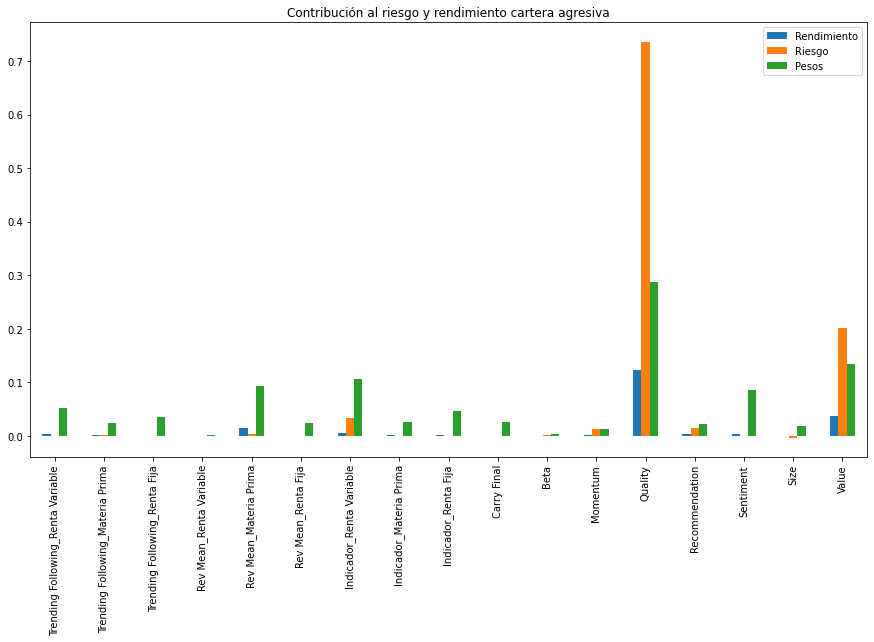

In [60]:
rendimiento_agr.plot.bar(title = "Contribución al riesgo y rendimiento cartera agresiva", figsize = (15, 8))

### Beta agresiva

In [61]:
rentabilidades_agr = cartera_final_agr.pct_change().dropna()

In [62]:
beta_agr = rentabilidades_agr.cov().div(rentabilidades_agr.var())
beta_agr

,Trending Following_Renta Variable,Trending Following_Materia Prima,Trending Following_Renta Fija,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija,Carry Final,Beta,Momentum,Quality,Recommendation,Sentiment,Size,Value,Suma
Trending Following_Renta Variable,1.000000,0.017855,-0.361152,0.339205,0.025739,-0.204508,0.119166,-0.037827,0.016471,-0.127129,-0.033262,-0.043789,-0.011899,-0.065297,-0.016058,-0.061101,-0.027569,-0.008167
Trending Following_Materia Prima,0.009123,1.000000,0.151233,0.016291,0.424134,0.006599,0.002299,0.040728,-0.043048,-0.011043,-0.031808,0.017008,0.008617,-0.016407,-0.037840,-0.028308,0.017772,0.020915
Trending Following_Renta Fija,-0.085099,0.069745,1.000000,-0.013286,0.034046,0.344806,-0.019600,-0.016163,0.045477,-0.018224,-0.001970,0.007537,-0.001246,0.018959,-0.004847,0.050545,0.004549,0.000161
Rev Mean_Renta Variable,0.559279,0.052571,-0.092967,1.000000,-0.037639,-0.142091,0.014008,-0.078441,0.046656,-0.149068,-0.070017,-0.101429,-0.041826,-0.100769,-0.002205,0.034215,-0.079661,-0.081179
Rev Mean_Materia Prima,0.017628,0.568530,0.098959,-0.015635,1.000000,0.022008,0.007015,0.114503,0.013884,-0.005875,-0.030918,-0.012620,-0.001225,-0.030426,-0.046718,-0.043374,0.010894,0.014766
Rev Mean_Renta Fija,-0.062619,0.003954,0.448057,-0.026387,0.009839,1.000000,-0.001521,-0.029646,-0.071539,-0.052416,0.004408,-0.003733,-0.002384,-0.000770,-0.008729,0.030393,0.003577,-0.001163
Indicador_Renta Variable,0.581989,0.021977,-0.406252,0.041493,0.050024,-0.024256,1.000000,-0.044342,0.335085,-0.180805,0.109260,0.087214,0.031105,0.006159,-0.106187,-0.098295,0.065413,0.141649
Indicador_Materia Prima,-0.091909,0.193680,-0.166664,-0.115595,0.406218,-0.235256,-0.022060,1.000000,0.101445,0.025501,-0.030277,-0.049530,-0.002418,-0.076731,0.035237,-0.072426,0.005016,0.014456
Indicador_Renta Fija,0.019690,-0.100718,0.230715,0.033827,0.024233,-0.279297,0.082018,0.049910,1.000000,0.157815,0.010370,-0.019664,-0.014931,-0.005589,-0.026386,-0.001829,-0.030060,-0.011502
Carry Final,-0.128824,-0.021901,-0.078374,-0.091616,-0.008692,-0.173469,-0.037514,0.010635,0.133778,1.000000,0.058837,0.022069,0.001926,0.062234,0.035323,0.132350,-0.003834,0.008915


In [63]:
betas['Beta_agr'] = beta_agr['Beta']
betas

,Beta_cons,Beta_mod,Beta_agr
Trending Following_Renta Variable,0.577640,-0.033262,-0.033262
Trending Following_Materia Prima,0.407727,-0.031808,-0.031808
Trending Following_Renta Fija,0.134750,-0.001970,-0.001970
Rev Mean_Renta Variable,1.082762,-0.070017,-0.070017
Rev Mean_Materia Prima,0.466098,-0.030918,-0.030918
Rev Mean_Renta Fija,0.069065,0.004408,0.004408
Indicador_Renta Variable,0.649013,0.109260,0.109260
Indicador_Materia Prima,0.035149,-0.030277,-0.030277
Indicador_Renta Fija,0.321471,0.010370,0.010370
Carry Final,0.127544,0.058837,0.058837


In [64]:
betas.to_excel('Betas.xlsx')

## COMPARACIÓN CARTERAS

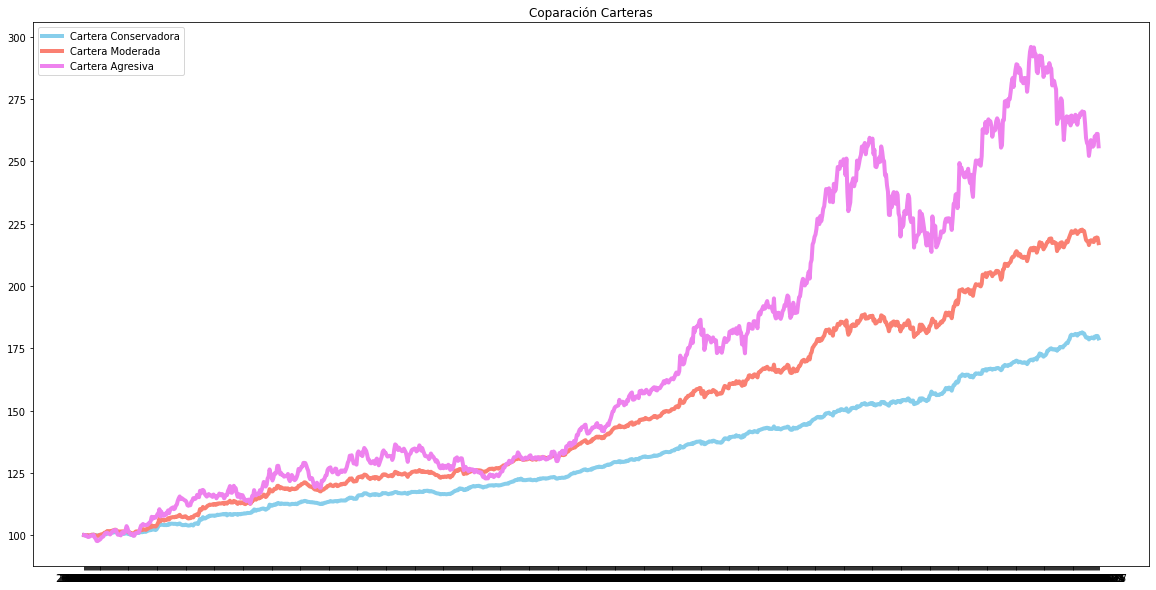

In [65]:
plt.figure(figsize=(20,10))
plt.plot(cartera_final_cons.index, cartera_final_cons['Suma'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Cartera Conservadora')
plt.plot(cartera_final_mod.index, cartera_final_mod['Suma'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Cartera Moderada')
plt.plot(cartera_final_agr.index, cartera_final_agr['Suma'], marker='', markerfacecolor='violet', markersize=12, color='violet', 
         linewidth=4, label = 'Cartera Agresiva')
plt.title('Coparación Carteras')
plt.legend()

__Bibliografía:__

* https://www.linkedin.com/pulse/frontera-eficiente-en-python-oscar-rojas-cfa
* http://amarjen.github.io/dibujar-frontera-eficiente.html#.XqR0ImgzZPY
* https://www.pythonforfinance.net/2017/01/21/investment-portfolio-optimisation-with-python/